# Simple Linear Regression & Multiple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
dataset = pd.read_csv("Salary_Data.csv")
dataset2 = pd.read_csv("Salary_Data2.csv")

In [3]:
# Whole dataset preview
dataset

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2
5,1.5,37.7
6,2.0,43.5
7,2.2,39.8
8,2.9,56.6
9,3.0,60.1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           33 non-null     float64
dtypes: float64(2)
memory usage: 656.0 bytes


In [5]:
dataset.describe()

,YearsExperience,Salary
count,33.000000,33.000000
mean,4.881818,72.551515
std,3.036904,28.304617
min,0.300000,36.200000
25%,2.900000,54.400000
50%,4.100000,63.200000
75%,7.100000,98.200000
max,10.500000,122.300000


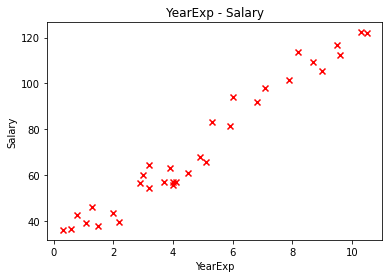

In [6]:
x = dataset["YearsExperience"]
y = dataset["Salary"]

plt.scatter(x ,y, marker = "x", color = "red")
plt.title("YearExp - Salary")
plt.xlabel("YearExp")
plt.ylabel("Salary")
plt.show()

## Simple Linear Regression (Model)
### y = mx + c

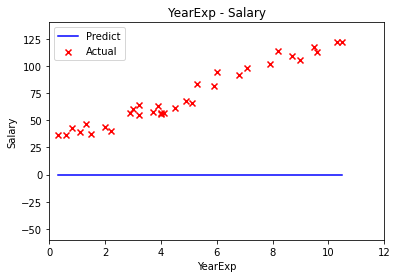

In [7]:
def  plot_pred(m, c):
    y_pred =  m * x + c

    plt.plot(x, y_pred, color = "blue", label = "Predict")
    plt.scatter(x ,y, marker = "x", color = "red", label = "Actual")
    plt.legend()
    plt.title("YearExp - Salary")
    plt.xlim([0,12])
    plt.ylim([-60, 140])
    plt.xlabel("YearExp")
    plt.ylabel("Salary")
    plt.show()

plot_pred(0, 0)

In [8]:
from ipywidgets import interact 

interact(plot_pred, m = (-100, 100 , 1), c = (-100, 100, 1))

interactive(children=(IntSlider(value=0, description='m', min=-100), IntSlider(value=0, description='c', min=-…

<function __main__.plot_pred(m, c)>

### Cost Function
#### Find the most suitable straight line (越小越好)
#### Cost Func. = (Actual Value {y} - Predict Value {y_pred})^2

In [9]:
def compute_cost(x, y, m, c):
    y_pred =  m * x + c
    
    cost = (y - y_pred) ** 2
    cost = cost.sum() / len(x)
    return cost

compute_cost(x, y, 10, 10)

227.88121212121214

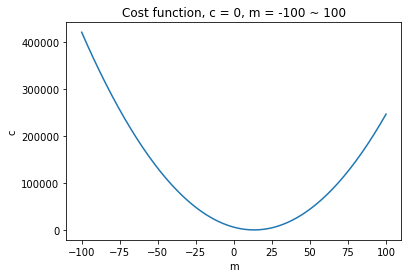

In [10]:
# c = 0, m = -100 ~ 100, cost = ?

costs = []

for m in range(-100, 101):
    cost = compute_cost(x, y, m, 0)
    costs.append(cost)

#plt.scatter(range(-100, 101), costs)
plt.plot(range(-100, 101), costs)
plt.title("Cost function, c = 0, m = -100 ~ 100")
plt.xlabel("m")
plt.ylabel("c")
plt.show()

In [11]:
# c = -100 ~ 100, m = -100 ~ 100, cost = ?

mArray = np.arange(-100, 101)
cArray = np.arange(-100, 101)
costsArray = np.zeros((201, 201))

i = 0
for m in mArray:
    j = 0
    for c in cArray:
        cost = compute_cost(x, y, m, c)
        costsArray[i, j] = cost
        j = j + 1
    
    i = i + 1

costsArray

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

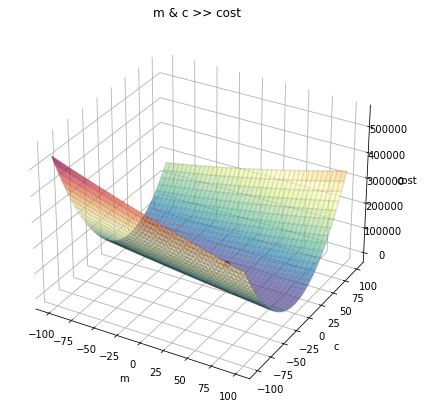

When m =  [9] and c =  [29] . It has the lowest cost of  [32.69484848]


In [12]:
plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.xaxis.set_pane_color((0, 0, 0))
ax.yaxis.set_pane_color((0, 0, 0))
ax.zaxis.set_pane_color((0, 0, 0))

# Into 2-D grid
m_grid, c_grid = np.meshgrid(mArray, cArray)

# cmap = change color, alpha = transparency
ax.plot_surface(m_grid, c_grid, costsArray, cmap = "Spectral_r", alpha = 0.7)
# Add grid line
ax.plot_wireframe(m_grid, c_grid, costsArray, color="black", alpha = 0.1)

ax.set_title("m & c >> cost")
ax.set_xlabel("m")
ax.set_ylabel("c")
ax.set_zlabel("cost")

# Find where is the minimal cost in the costs array ( Not good method, instead use gradient  descent to find)
m_index, c_index = np.where(costsArray == np.min(costsArray))

#Plot out the lowest cost (s = size)
ax.scatter(mArray[m_index], cArray[c_index], costsArray[m_index, c_index], color = "red", s = 40)
plt.show()

# Location of lowest cost in the costs array
print("When m = ", mArray[m_index], "and c = ", cArray[c_index], ". It has the lowest cost of ", costsArray[m_index, c_index])

#### Gradient Descent (Optimizer of the model "Simple Linear Regression")
##### To find the lowest points cost function, according to gradient to change the {c}, by default c = 0
##### Also known as a gradient
##### Gradient Descent = (Actual value {y} - Predict value {y_pred})^2 = -2x(y - wx)
##### Learning rate = How much the point will go for, as time goes on, it will decrease (Avoid too big of learning rate = Never go to the lowest point)

In [13]:
# m_gradient = 2 * x * (m * x + c - y), the 2 no need to write also can, same sa c_gradient
def compute_gradient(x, y, m, c):
    m_gradient = (x * (m * x + c - y)).mean()
    c_gradient = ((m * x + c - y)).mean()
    return m_gradient, c_gradient

compute_gradient(x, y, 20, 10)

(268.54757575757577, 35.08484848484849)

In [14]:
def gradient_descent(x, y, m_init, c_init, learningRate, costFunction, gradientFunction, runIter, pIter = 1000):
    cost_hist = []
    m_hist = []
    c_hist = []
    
    m = m_init
    c = c_init
    
    for i in range(runIter):
        m_gradient, c_gradient = gradientFunction(x, y, m, c)

        m = m - m_gradient * learningRate
        c = c - c_gradient * learningRate
        cost = costFunction(x, y, m, c)
        
        m_hist.append(m)
        c_hist.append(c)
        cost_hist.append(cost)
        
        if i % pIter == 0:
            print("Interation ", i, ": Cost: ", cost, ", m: ", m, " c: ", c, " m_gradient: ", m_gradient, " c_gradient: ", c_gradient)
    
    return m, c, m_hist, c_hist, cost_hist

m_final, c_final, m_hist, c_hist, cost_hist = gradient_descent(x, y, 0, 0, 0.001, compute_cost, compute_gradient, 20000, pIter = 1000)

Interation  0 : Cost:  5656.799173956598 , m:  0.43577969696969693  c:  0.07255151515151517  m_gradient:  -435.77969696969694  c_gradient:  -72.55151515151518
Interation  1000 : Cost:  140.97017943115677 , m:  12.118801791741898  c:  8.06663192056362  m_gradient:  0.7995840826817423  c_gradient:  -5.324517395457908
Interation  2000 : Cost:  96.06257776239116 , m:  11.417134443574557  c:  12.739111128263819  m_gradient:  0.6122617615022388  c_gradient:  -4.077117679426546
Interation  3000 : Cost:  69.73166858925634 , m:  10.879850002973441  c:  16.316946670827456  m_gradient:  0.4688243209398313  c_gradient:  -3.121952157781088
Interation  4000 : Cost:  54.29292877416395 , m:  10.468437713565892  c:  19.05658586462761  m_gradient:  0.3589906437491879  c_gradient:  -2.390557752270927
Interation  5000 : Cost:  45.240651638161964 , m:  10.15340891487932  c:  21.15439690790092  m_gradient:  0.27488821834394067  c_gradient:  -1.8305105517710443
Interation  6000 : Cost:  39.93298259726776 , m

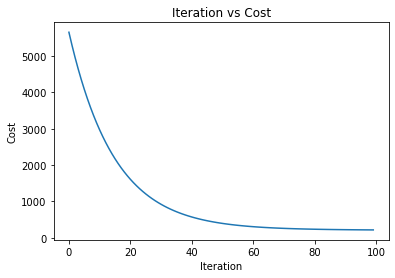

In [15]:
plt.plot(np.arange(0, 100), cost_hist[:100])
plt.title("Iteration vs Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [16]:
print("The final m = ", m_final, " and the final c = ", c_final)

The final m =  9.142528600076414  and the final c =  27.885958900526827


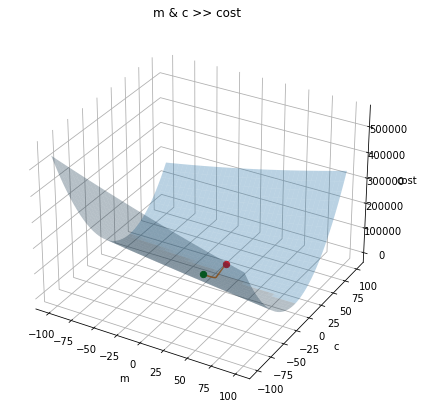

In [17]:
plt.figure(figsize=(7, 7))
ax2 = plt.axes(projection="3d")
ax2.xaxis.set_pane_color((0, 0, 0))
ax2.yaxis.set_pane_color((0, 0, 0))
ax2.zaxis.set_pane_color((0, 0, 0))

# cmap = change color, alpha = transparency
ax2.plot_surface(m_grid, c_grid, costsArray, alpha = 0.3)

ax2.set_title("m & c >> cost")
ax2.set_xlabel("m")
ax2.set_ylabel("c")
ax2.set_zlabel("cost")

#Plot out the lowest cost (s = size), Green is using gradient descent to find, red is one by one
ax2.scatter(mArray[m_index], cArray[c_index], costsArray[m_index, c_index], color = "red", s = 40)
ax2.scatter(m_hist[0], c_hist[0], cost_hist[0], color = "green", s = 40)
ax2.plot(m_hist, c_hist, cost_hist)
plt.show()

In [18]:
# If one guy has 3.5 years working experiences, what salary should give him?
print(f"3.5 Years working experiences is worth with {m_final * 3.5 + c_final:.1f} K New Taiwan dollar")

# If one guy has 5.9 years working experiences, what salary should give him?
print(f"3.5 Years working experiences is worth with {m_final * 5.9 + c_final:.1f} K New Taiwan dollar")

3.5 Years working experiences is worth with 59.9 K New Taiwan dollar
3.5 Years working experiences is worth with 81.8 K New Taiwan dollar


## Multiple Linear Regression

### More factors to determine the predict value
### Formula: w1x1 + w2x2 + w3x3 + ... + b, (x is factor)

In [19]:
dataset2

,YearsExperience,EducationLevel,City,Salary
0,3.0,大學,城市A,45.9
1,7.8,碩士以上,城市C,80.5
2,2.3,高中以下,城市A,25.2
3,5.1,高中以下,城市A,30.4
4,10.0,碩士以上,城市B,65.7
5,1.2,碩士以上,城市C,60.8
6,8.6,大學,城市C,50.1
7,6.9,碩士以上,城市A,70.3
8,4.2,大學,城市A,40.7
9,2.4,高中以下,城市A,28.1


### Label Encoding
#### Convert words into number by inserting numbers to each data
#### Which has the 大小 relationship

In [20]:
dataset2["EducationLevel"] = dataset2["EducationLevel"].map({"高中以下": 0, "大學": 1, "碩士以上": 2})
dataset2

,YearsExperience,EducationLevel,City,Salary
0,3.0,1,城市A,45.9
1,7.8,2,城市C,80.5
2,2.3,0,城市A,25.2
3,5.1,0,城市A,30.4
4,10.0,2,城市B,65.7
5,1.2,2,城市C,60.8
6,8.6,1,城市C,50.1
7,6.9,2,城市A,70.3
8,4.2,1,城市A,40.7
9,2.4,0,城市A,28.1


### One-Hot Encoding
#### Convert words into number by inserting numbers to each data
#### Add more features from the data (Used when you don't know the data whether has 大小 relationship)

In [21]:
onehot_encoder = OneHotEncoder()

# Insert data into one-hot encoder, but it has to be 2D
onehot_encoder.fit(dataset2[["City"]])

# Transform the city data (it gives sparse matrix)
cityEncoded = onehot_encoder.transform(dataset2[["City"]]).toarray()

cityEncoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [22]:
# Add cityA, cityB, cityC
dataset2[["CityA", "CityB", "CityC"]] = cityEncoded

# Delete city & cityC (CityC because it can depends the result of cityA & cityB to predict the cityC)
dataset2 = dataset2.drop(["City", "CityC"], axis = 1)

dataset2

,YearsExperience,EducationLevel,Salary,CityA,CityB
0,3.0,1,45.9,1.0,0.0
1,7.8,2,80.5,0.0,0.0
2,2.3,0,25.2,1.0,0.0
3,5.1,0,30.4,1.0,0.0
4,10.0,2,65.7,0.0,1.0
5,1.2,2,60.8,0.0,0.0
6,8.6,1,50.1,0.0,0.0
7,6.9,2,70.3,1.0,0.0
8,4.2,1,40.7,1.0,0.0
9,2.4,0,28.1,1.0,0.0


### Train Sets & Test Sets

In [23]:
x = dataset2[["YearsExperience", "EducationLevel", "CityA", "CityB"]]
y = dataset2["Salary"]

# 80% Train & 20% Test, Random State = fixed the split dataset with random number
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 87)

# Into array format
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

### Feature Scaling (x)
#### To accelerate the gradient descent
#### E.g. Standardization

In [24]:
dataset2.head(10)
# YearExperience = 1 ~ 10, EducationLevel = 0 ~ 2, CityA & CityB = 0 ~ 1
# So YearExperience has a high scale compared to other factors

,YearsExperience,EducationLevel,Salary,CityA,CityB
0,3.0,1,45.9,1.0,0.0
1,7.8,2,80.5,0.0,0.0
2,2.3,0,25.2,1.0,0.0
3,5.1,0,30.4,1.0,0.0
4,10.0,2,65.7,0.0,1.0
5,1.2,2,60.8,0.0,0.0
6,8.6,1,50.1,0.0,0.0
7,6.9,2,70.3,1.0,0.0
8,4.2,1,40.7,1.0,0.0
9,2.4,0,28.1,1.0,0.0


In [25]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Cost Function = (Train Value - Predict Value) ^ 2

In [26]:
# y_pred = w1x1 + w2x2 + w3x3 + ... + b

def compute_cost2(x, y, w, b):
    y_pred = (x * w).sum(axis = 1) + b
    cost = ((y - y_pred) ** 2).mean()
    return cost

w = np.array([0, 2, 2, 4])
b = 0
compute_cost2(x_train, y_train, w, b)

2822.234209806599

### Gradient Descent (Optimizer)
#### To find the minimum "w" & "b" (Gradient)
#### Learning rate, multiple in each w and b

In [27]:
#w1 = 2 * x1(y_pred - y), 2 can be ignored same as the rest, so w1 = x1(y_pred - y)* learning rate
#w2 = 2 * x2(y_pred - y)  >> x2(y_pred - y)* learning rate
#w3 = 2 * x3(y_pred - y)  >> x3(y_pred - y) * learning rate
#b = 2 (y_pred - y)             >> (y_pred - y) * learning rate

y_pred = (x_train * w).sum(axis = 1) + b

b_gradient = (y_pred - y_train).mean()

w_gradient = np.zeros(x_train.shape[1])

for i in range(x_train.shape[1]):
    w_gradient[i] = (x_train[:,  i] * (y_pred - y_train)).mean()

w_gradient, b_gradient


(array([ -6.35305402, -12.62906041,  10.23132015,  -1.76948291]), -50.95)

In [28]:
def compute_gradient2(x, y, w, b):
    y_pred = (x * w).sum(axis = 1) + b

    b_gradient = (y_pred - y).mean()

    w_gradient = np.zeros(x.shape[1])

    for i in range(x_train.shape[1]):
        w_gradient[i] = (x[:,  i] * (y_pred - y)).mean()

    return w_gradient, b_gradient

w = np.array([0, 2, 2, 4])
b = 0
compute_gradient2(x_train, y_train, w, b)

(array([ -6.35305402, -12.62906041,  10.23132015,  -1.76948291]), -50.95)

In [29]:
w = np.array([1, 2, 2, 4])
b = 1
learning_rate2 = 0.001

# Before gradient descent
w_gradient, b_gradient = compute_gradient2(x_train, y_train, w, b)
print(compute_cost2(x_train, y_train, w, b))

# After gradient descsent
w = w - w_gradient * learning_rate2
b = b - b_gradient * learning_rate2
print(compute_cost2(x_train, y_train, w, b))

2709.6281017583538
2704.098469896066


In [30]:
def gradient_descent2(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):
  
    c_hist = []
    w_hist= []
    b_hist = []
  
    w = w_init
    b= b_init

    for i in range(run_iter):
        w_gradient, b_gradient = gradient_function(x, y, w, b)

        w = w - w_gradient*learning_rate
        b = b - b_gradient*learning_rate
        cost = cost_function(x, y, w, b)

        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)

        if i%p_iter == 0:
            print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w}, b: {b: .2e}, w_gradient: {w_gradient}, b_gradient: {b_gradient: .2e}")

    return w, b, w_hist, b_hist, c_hist

In [31]:
w_init = np.array([1, 2, 2, 4])
b_init = 0
learning_rate = 1.0e-2
run_iter = 10000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent2(x_train, y_train, w_init, b_init, learning_rate, compute_cost2, compute_gradient2, run_iter)


Iteration     0 : Cost  2.7535e+03, w: [1.05353054 2.12204495 1.90383227 4.01121361], b:  5.10e-01, w_gradient: [ -5.35305402 -12.20449464   9.61677346  -1.12136056], b_gradient: -5.10e+01
Iteration  1000 : Cost  2.5326e+01, w: [ 3.72540311 13.89686882 -1.81791386 -3.50710243], b:  5.09e+01, w_gradient: [-0.09610972 -0.0624271  -0.08599503  0.07253282], b_gradient: -2.20e-03
Iteration  2000 : Cost  2.5223e+01, w: [ 4.08508977 14.12150213 -1.48890741 -3.76201024], b:  5.09e+01, w_gradient: [-0.00824552 -0.00509522 -0.00772149  0.00559777], b_gradient: -9.50e-08
Iteration  3000 : Cost  2.5222e+01, w: [ 4.11560693 14.14040926 -1.46025536 -3.78269671], b:  5.09e+01, w_gradient: [-0.00069779 -0.00043374 -0.00065704  0.00047237], b_gradient: -4.11e-12
Iteration  4000 : Cost  2.5222e+01, w: [ 4.1181916  14.14201652 -1.45782084 -3.78444619], b:  5.09e+01, w_gradient: [-5.91599345e-05 -3.68050199e-05 -5.57431415e-05  4.00384558e-05], b_gradient: -3.47e-13
Iteration  5000 : Cost  2.5222e+01, w: 

In [32]:
w_final, b_final

(array([ 4.11843107, 14.14216551, -1.45759519, -3.78460825]),
 50.949999999999655)

In [33]:
# Results of prediction
y_pred = (w_final * x_test).sum(axis = 1) + b_final
pd.DataFrame({
    "y_pred": y_pred,
    "y_test": y_test
})

,y_pred,y_test
20,44.035070,43.8
16,67.440313,72.7
5,61.954972,60.8
27,23.802655,24.9
32,62.748179,56.3
2,23.485373,25.2
1,72.425307,80.5
7,68.074879,70.3


In [34]:
# Determine the y_pred good? Use cost
# Test sets cost is smaller than train sets cost > good
compute_cost2(x_test, y_test, w_final, b_final)

18.116060544218644

In [35]:
# 5.3 Working Experiences, 硕士以上, 城市A
# 7.2 Working Experiences, 高中以下, 城市B

x_real = np.array([[5.3, 2, 1, 0], [7.2, 0, 0, 1]])
x_real = scaler.transform(x_real)
y_real = (w_final * x_real).sum(axis = 1) + b_final
y_real

# 65.5K, 23.4K

array([65.53661553, 23.36603997])